In [21]:
import numpy as np
import matplotlib.pyplot as plt

import moviepy.editor as mpy                           # for video generation

from moviepy.editor import AudioFileClip

import wavio                                          # to obtain the audio as a downloaded file

import cv2
import os
from os.path import join, isfile

# Definitions

$0<a<1$ and $b$ is an odd positive integer satisfying $ab>1+\frac{3\pi}{2}$

In [2]:
def W(x,a,b,n):                                         # n-th approximation to the Weierstrass function at x with values a and b
    return np.sum( [np.cos(np.pi * x * b**m) * a**m for m in range(n+1)] )
    

In [3]:
X = np.linspace(0,2,44100, endpoint = False)  #values of a = 0.5, b = 440 satisfy Weierstrass's original conditions

# Saving all the different images to make the video file

No handles with labels found to put in legend.


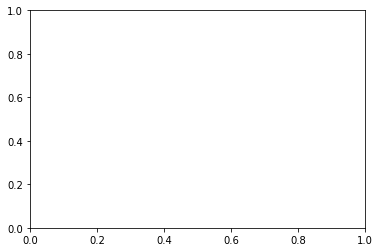

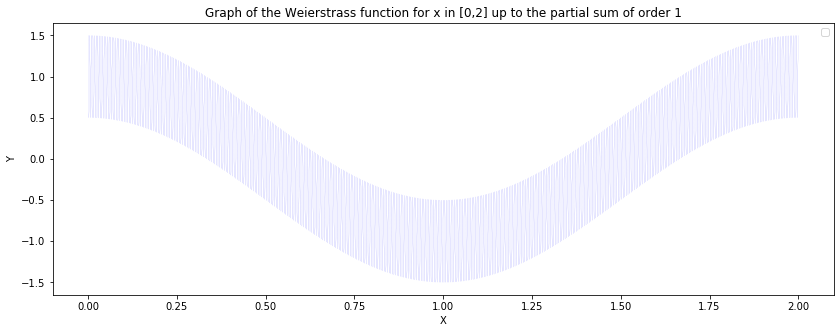

No handles with labels found to put in legend.


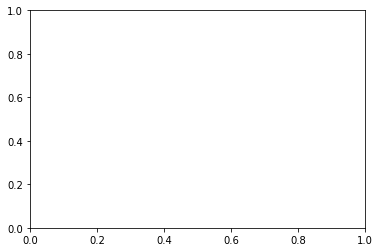

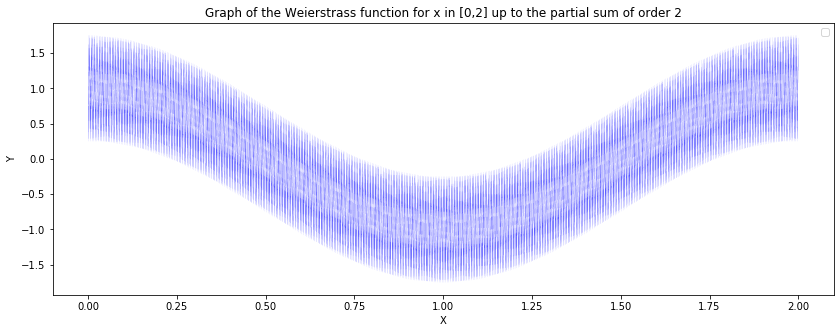

No handles with labels found to put in legend.


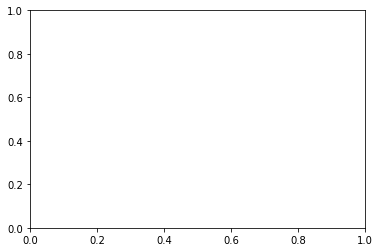

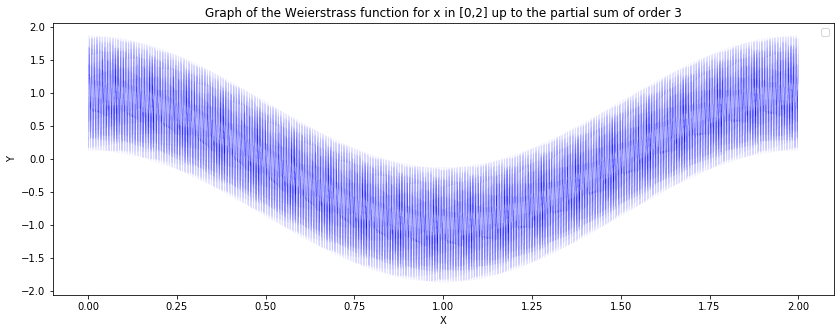

No handles with labels found to put in legend.


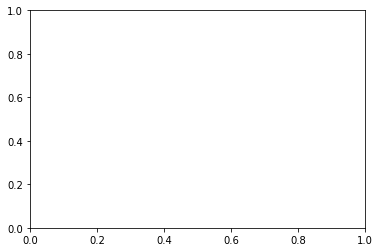

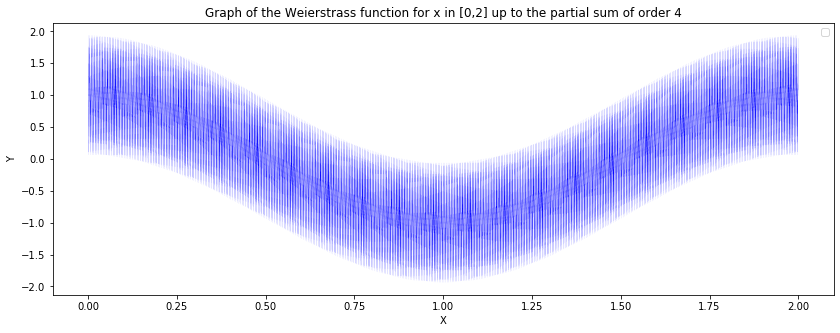

No handles with labels found to put in legend.


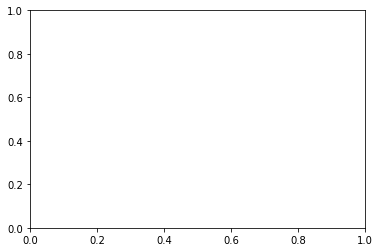

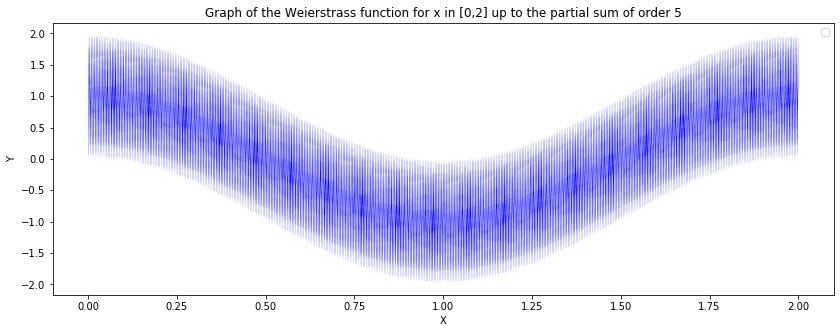

No handles with labels found to put in legend.


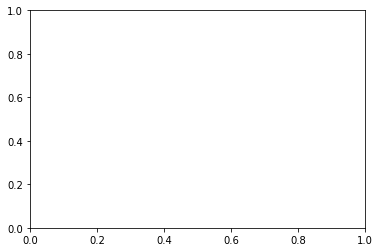

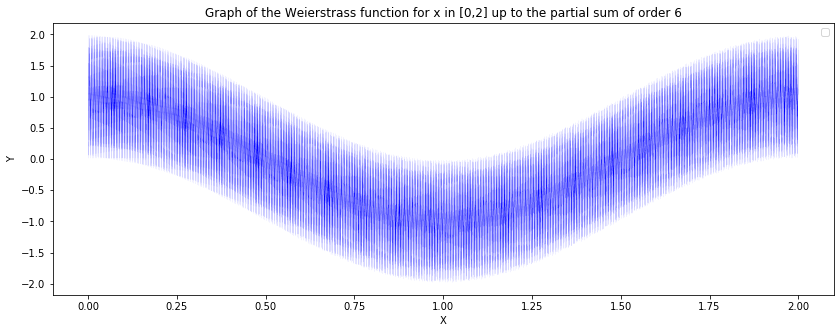

No handles with labels found to put in legend.


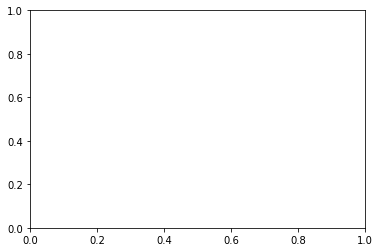

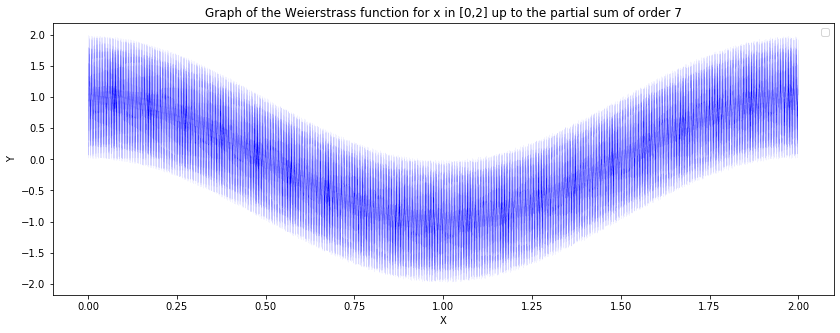

In [4]:
########
# saves the image automatically
# we produce the imagen of the 7 first partial sums
#######

for i in range(1,8):
    fig, ax = plt.subplots()
    Y = np.array([W(x,0.5,440,i) for x in X])
    plt.figure(figsize=(14, 5))
    plt.plot(X, Y, 'b-', linewidth = 0.05)
    plt.legend(loc='best')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Graph of the Weierstrass function for x in [0,2] up to the partial sum of order ' + str(i))
    plt.savefig('weierstrass_'+str(i)+'.png')    
    plt.show()

# Downloadable files of audio and images

In [5]:
rate = 20000

In [6]:
########
# downloads the audio automatically as .wav
#######

base_name = 'weierstrass_'
for i in range(1,8):
    full_name = base_name + str(i)+'.wav'
    Y = np.array([W(x,0.5,440,i) for x in X])
    wavio.write(full_name, Y, rate, sampwidth=3)


In [7]:
########
# downloads the audio automatically as .mp3
#######

base_name = 'weierstrass_'
for i in range(1,8):
    full_name = base_name + str(i)+'.mp3'
    Y = np.array([W(x,0.5,440,i) for x in X])
    wavio.write(full_name, Y, rate, sampwidth=3)


# Output a wav file that is a concatenation of all the audios generated above 

In [8]:
rate = 20000
fullArray = np.array([])
for i in range(1,8):
    fullArray = np.append(fullArray, np.array([W(x,0.5,440,i) for x in X]))
    
wavio.write('fullAudio.wav', fullArray, rate, sampwidth=3)


# Video generation

In [17]:
def picToVideo(pathIn, pathOut, fps, time): #path of input, path of output, frames per second and how much time every picture is going to appear
    ''' this functions converts a list of images to video'''
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn,f))]  #go to the directory, list the names of the files inside and if those files 
    
    for i in range(len(files)):
        filename = pathIn+files[i] # for each picture, the directory of that picture
        img = cv2.imread(filename)
        height, width ,layers = img.shape
        size = (width, height)
        
        for k in range(time):      # write the same images for as much time as I want
            frame_array.append(img)
            
    out = cv2.VideoWriter(pathOut, cv2.VideoWriter_fourcc(*'mp4v'), fps, size)
    
    for i in range(len(frame_array)):
        out.write(frame_array[i])
        
    
    out.release()

In [18]:
directory = 'C:/Users/haffa/images'
pathIn = directory+'/'
pathOut = pathIn + 'video_weierstrass.avi'
fps = 1
time =2

In [19]:
picToVideo(pathIn, pathOut, fps, time)

# Add audio to video

In [22]:
clip = mpy.VideoFileClip(pathOut)
audioclip = AudioFileClip("fullAudio.wav")
videoclip = clip.set_audio(audioclip)

In [23]:
videoclip.ipython_display()

chunk:  27%|████████████████▊                                              | 91/341 [00:00<00:00, 904.28it/s, now=None]

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4

Moviepy - Done !
Moviepy - video ready __temp__.mp4
